                                            NORTH DALLAS DATA SCIENCE MEETUP

In [1]:
#Import pandas
import pandas as pd
# Import numpy
import numpy as np
# Import matplotlib
import matplotlib.pyplot as plt
#Import statsmodels
import statsmodels.formula.api as smf
import statsmodels.graphics.api as smg
# Import the linear regression class
from sklearn.linear_model import LinearRegression

#Import seaborn
import seaborn as sns 
sns.set_style("white")
#make figures appear as they're made
%matplotlib inline 

In [2]:
# Always good practice to note the version info so that its easier to debug when in trouble
import sys
import matplotlib as mpl
print("python " + sys.version)
print("")
print("pandas " + str(pd.__version__))
print("numpy " + np.__version__)
#print("matplotlib " + mpl.__version__)
print("seaborn " + sns.__version__)

python 3.5.2 |Anaconda 4.2.0 (64-bit)| (default, Jul  5 2016, 11:41:13) [MSC v.1900 64 bit (AMD64)]

pandas 0.18.1
numpy 1.11.1
seaborn 0.8.0


In [23]:
county = pd.read_csv("https://www.openintro.org/stat/data/cc.txt",delimiter = '\t')

In [65]:
county.shape

(3083, 25)

In [24]:
county.describe()

,growth,FIPS,pop2010,pop2000,age_under_5,age_under_18,age_over_65,female,black,hispanic,...,bachelors,mean_work_travel,home_ownership,housing_multi_unit,median_val_owner_occupied,persons_per_household,per_capita_income,poverty,sales_per_capita,density
count,3083.000000,3083.000000,3.083000e+03,3.083000e+03,3083.000000,3083.000000,3083.000000,3083.000000,3083.000000,3083.000000,...,3083.000000,3083.000000,3083.000000,3083.000000,3.083000e+03,3083.000000,3083.000000,3083.000000,3083.000000,3083.000000
mean,5.415999,30366.108336,1.000342e+05,9.119038e+04,6.261693,23.413850,15.828965,50.045800,9.038177,8.294324,...,19.049367,22.804314,73.266980,12.442361,1.330925e+05,2.514106,22492.096659,15.536880,10380.315277,263.711807
std,13.178982,15176.252119,3.156555e+05,2.949622e+05,1.154413,3.346242,4.149026,2.222767,14.590681,13.238824,...,8.690303,5.468255,7.793906,9.289472,8.851122e+04,0.247459,5403.320896,6.329355,5333.799780,1740.310346
min,-46.604888,1001.000000,8.200000e+01,6.700000e+01,0.000000,0.000000,3.500000,27.900000,0.000000,0.100000,...,3.700000,4.300000,0.000000,0.000000,0.000000e+00,1.100000,7772.000000,0.000000,0.000000,0.000000
25%,-2.318303,18172.000000,1.170800e+04,1.173150e+04,5.500000,21.400000,13.100000,49.700000,0.500000,1.600000,...,13.100000,19.100000,69.500000,6.200000,8.070000e+04,2.370000,19014.500000,11.000000,7011.000000,18.300000
50%,3.288541,29145.000000,2.647000e+04,2.544700e+04,6.200000,23.300000,15.500000,50.500000,2.100000,3.300000,...,16.900000,22.500000,74.600000,9.800000,1.069000e+05,2.490000,21765.000000,14.800000,9800.000000,46.300000
75%,10.378521,45074.000000,6.867850e+04,6.290400e+04,6.800000,25.100000,18.100000,51.100000,10.500000,8.200000,...,22.600000,26.200000,78.400000,16.000000,1.534500e+05,2.630000,24806.000000,19.000000,12969.500000,116.750000
max,110.354943,56045.000000,9.818605e+06,9.519338e+06,12.600000,41.600000,43.400000,56.800000,85.700000,95.700000,...,71.000000,44.200000,91.300000,98.500000,1.000001e+06,4.470000,64381.000000,53.500000,80800.000000,69467.500000


In [41]:
county.columns

Index(['growth', 'FIPS', 'pop2010', 'pop2000', 'age_under_5', 'age_under_18',
       'age_over_65', 'female', 'black', 'hispanic', 'white_not_hispanic',
       'no_move_in_one_plus_year', 'foreign_born', 'foreign_spoken_at_home',
       'hs_grad', 'bachelors', 'mean_work_travel', 'home_ownership',
       'housing_multi_unit', 'median_val_owner_occupied',
       'persons_per_household', 'per_capita_income', 'poverty',
       'sales_per_capita', 'density'],
      dtype='object')

In the above table, descriptive statistics of FIPS code does not make sense because it is a nominal variable. What is a nominal variable you may ask? Well, read on below about the types of variables. 

1. Categorical variables : The variables belong to groups
2. Continuous variables : Variable with many different possible values - time, weight
3. Discrete variables : Variables that take only certain fixed number of values, eg., number of people in this classroom
4. Nominal variable : Same like categorical variable but uniquely identifies a value
5. Ordinal variable : Again, like a categorical variable but the groups have some order of importance, eg., ranking of officials in the army. 

There are many other different types of variables, but these are some of the most commonly used. 


### Covariance 
Covariance measures how two variables vary in tandem from their means. 

If the covariance is positive and relatively large, it means if one variable is above its mean value, the other variable tends to be above its mean or vice versa (both below their respective means). A large negative covariance indicates if one variable is above its mean, the other variable tends to be below its mean. Covariance close to 0 indicates no relationship.

Covariance is calculated using the following equation:

\begin{equation}
cov(x,y) = \frac{\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y})}{n-1} 
\end{equation}

$x$ = predictor variable, $\bar{x}$ = mean of predictor variable, $y$ = outcome variable, $\bar{y}$ = mean of outcome variable, $n$ = sample size

Covariance of a variable with itself is basically just the variance or standard deviation square as we calculated above! Simple!

### Correlation
Unlike covariance, correlation is unitless and always between -1 (perfectly anti-correlated) and 1 (perfectly correlated). Correlation is basically covariance scaled by the respective standard deviations of each variable, which acts to normalize the values and leads to no units. This can make it easier to interpret. 

The equation for correlation is:

\begin{equation}
cor(x,y) = \frac{cov(x,y)}{std(x)std(y)}
\end{equation}

cov(x,y) is the covariance of the predictor and outcome, as before. $std$ is the standard deviation. 

If correlation is 0, there is no measureable relationship between the variables. Correlation is sensitive to outliers.



### Simpson's Paradox and Causation

Sometimes correlation between variables can be misleading because of the presence of a confounding variable. This means that the _cause_ of variations in the two variables might actually be a third variable. Computing correlation assumes that all other variables are equally affecting the two variables you're comparing, which usually isn't true unless you've got a randomized experiment.

A good example : 
http://blog.revolutionanalytics.com/2013/07/a-great-example-of-simpsons-paradox.html

Remember "correlation does not imply causation" ? 


## Simple Linear Regression

Linear regression is a way of explaining linear relationships between variables. Simple linear regression uses only one predictor variable while multiple linear regression can include more predictors (also known as features) at once.

### Basics

The basic idea is that you want to find the line that best describes the relationship between a predictor (e.g. household income) and outcome (e.g. home value). Using the best fit line you calculate, you can predict the outcome for values of the predictor variable that may not be in your dataset.

In linear regression this relationship is expressed as:

$$ y = \beta x + \alpha + \epsilon $$

$\beta$ is the slope of the line, $\alpha$ is the y-intercept, and $\epsilon$ describes the noise of your data around the line. $\beta$ tells you how much the outcome value increases for every unit increase in the predictor. $\alpha$ tells you what the outcome would be even if the predictor is 0. $\epsilon$ should be small assuming your data is actually linear (e.g. if there was high linear correlation between variables).

This line is a model of the data!



### Finding the Best Fit Line using Least Squares

Values for $\alpha$ and $\beta$ (which define the regression line) are found using a least squares approach, illustrated below. In effect, the slope and intercept of the line are wiggled around until the offset between the data and the line are minimized. 

The distance between the data points and the line is measured by the "sum of squared errors", literally adding up the area of the squares formed from the difference between the measured outcome (from data) and predicted outcome (from estimated line). Whichever line (i.e. whichever values of $\alpha$ and $\beta$) gives the smallest sum of squared errors is the "least squares estimate", also known as the line of best fit. It's the best way to describe your linear data.

<img src=resources/leastsq.gif align="center" width="75%"></div>
Source: dynamicgeometry.com


### When you should use simple linear regression
To use linear regression, we want a predictor and outcome which both have continuous values and are linearly related to each other. 

### Assumptions

One tricky thing about using statistics correctly is to acknowledge and respect their limitations. Every statistical approach will have associated assumptions. Simple linear regression has four:

1. Linearity: the data should be best described by a line (instead of a curve, etc.)
    * Check with residual plot, should get random distribution around _y = 0_    
2. Homoscedasticity: variance should be constant for range of predictor values
    * Check with same residual plot, spread of residuals shouldn't get larger as a function of predictor value
3. Normality: errors should be normally distributed.
    * Check with Q-Q plot, should get the identity line
4. No autocorrelation of errors: each observation should be independent of the others
    * Check with residual plot, there shouldn't be a pattern

We could consider the relationship between a number of variables here. For simple linear regression, we'll consider only one predictor and one outcome. To decide which to use, it might be useful to look at the correlation between sets of variables.

In [25]:
# Correlation between per capita income and median value of owner-occupied homes is strongly positively correlated
print(county["per_capita_income"].corr(county.median_val_owner_occupied))
# Correlation between per capita income and poverty level is strongly negatively correlated.
print(county["per_capita_income"].corr(county.poverty))

0.74213681627
-0.704362709345


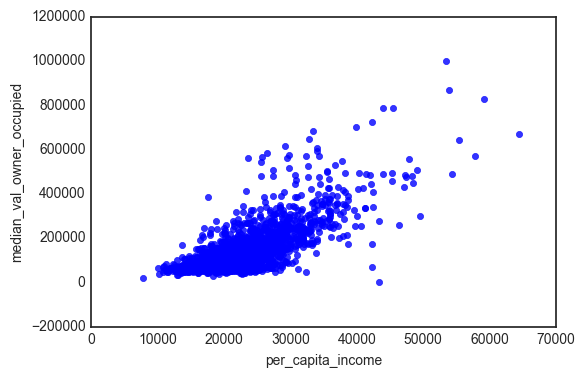

In [26]:
#plot the data
sns.regplot('per_capita_income', 'median_val_owner_occupied', 
           data=county, 
           fit_reg=False)

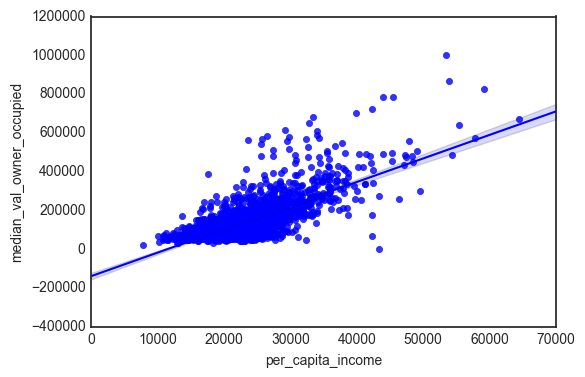

In [27]:
#plot with regression line
sns.regplot('per_capita_income', 'median_val_owner_occupied', 
           data=county, 
           fit_reg=True)

In [28]:
#calculate the linear model
#the regression model is expressed as outcome ~ predictor
lm=smf.ols(formula='median_val_owner_occupied ~ per_capita_income', data=county).fit()

#print the coefficient values, alpha and beta
print(lm.params)

Intercept           -140340.857930
per_capita_income        12.156864
dtype: float64


It's reasonable to assume _any_ house will have a value of at least \$0. And we see this in the data: there are no data points for home values less than \$0. So for negative home values, our line is an extrapolation and doesn't make sense.

In [29]:
# the minimum home value in the data
county["median_val_owner_occupied"].min()

0.0

Instead, consider the case of our lowest possible home value, \$0. We can find the minimum per capita income that corresponds to the minimum home value by plugging in \$0 for the home value:

$$ homeValue = \beta * income - \alpha $$

$$ 0 = 12.15 * income - 140,340 $$

$$ income = $11,550.69 $$

This means we estimate that homeowners in this census dataset make a minimum per capita income of \$11,550.69 to own even the cheapest house. Of course, this is only an estimate and won't agree with the data perfectly. (Though why is any house listed at $0 value? Perhaps this is mis-reported or missing data?)

In [30]:
# actual per capita income corresponding to home value of $0 in the dataset
county.per_capita_income[(county.median_val_owner_occupied == 0)]

538    43308
Name: per_capita_income, dtype: int64

In [31]:
lm.predict({'per_capita_income':[11550]}) #should be close to 0

array([ 70.92403931])

In [32]:
#predicted home value for per capita income of $75,000
print(lm.predict({'per_capita_income':[75000]})) 

[ 771423.96005295]


You can plug in any number you choose for income, but be wary of out-of-sample estimates. That is, our model has only been evaluated for the range of incomes covered by our data. The same model may not be appropriate for values of income outside this range.

In [33]:
#range of income in the data
print(county["per_capita_income"].min())
print(county["per_capita_income"].max())

7772
64381


### Evaluating the goodness of your model fit
To tell how well our line describes the data, we look at the $R^2$ value. $R^2$ is known as the _coefficient of determination_. It measures how much of the variance in the outcome variable (i.e. home value) is described by the model. $R^2$ ranges from 0 to 1 with a good fit being close to 1. In essence, a high R$^2$ values means that the predictor variable includes enough information to do a good job predicting what's going on with the outcome variable.

In [34]:
#print the R^2 value
print(lm.rsquared)

0.550767054063


This $R^2$ value for our income-home value data is relatively low. It tells us only 55% of the variance in median home value is explained by per capita income. This could suggest additional variables need to be included to better predict median home values. This is a job for multiple linear regression which we'll discuss in a future session.

Note the ols calculation also includes a lot more information for more complex statistical analysis:

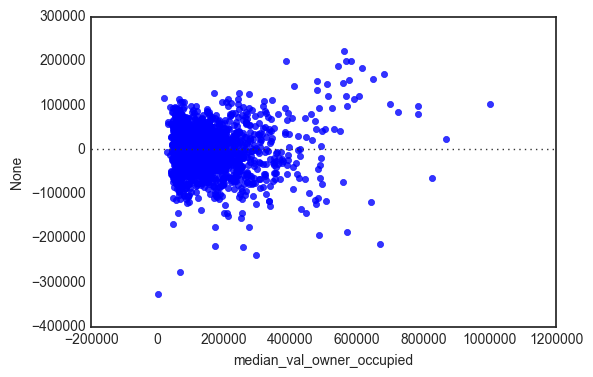

In [35]:
#check for linearity
sns.residplot(county.median_val_owner_occupied,lm.resid)

This looks fine for linearity. Nonlinear data would show residuals with some curvature around the 0 line like this:

<img src=resources/Nonlinear-residual.png align="center" width="50%"></div>

Source: http://docs.statwing.com/

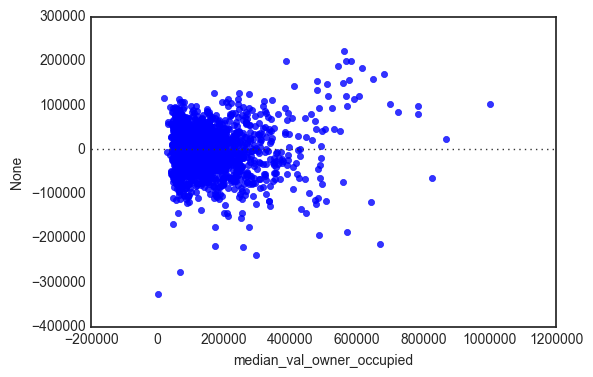

In [36]:
# check for constant variance (homoscedasticity)
sns.residplot(county.median_val_owner_occupied,lm.resid)

The spread about the 0 residual line doesn't seem to change all that much with home value, so the data appears homoscedastic. Heteroscedastic data would look something like this:


<img src=resources/heteroskedastic.png align="center" width="50%"></div>
Source: http://docs.statwing.com/

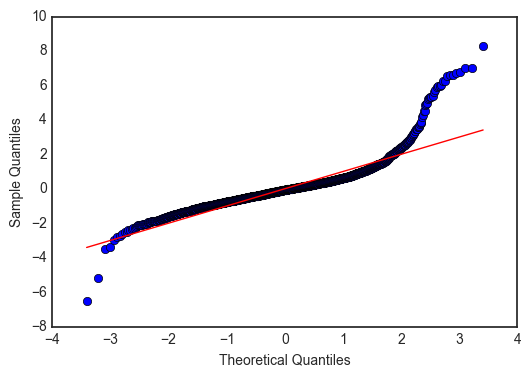

In [38]:
#check for normality
fig = plt.figure()
fig=smg.qqplot(lm.resid,fit=True, line='s')

This shape of QQ plot is not that uncommon. The data is normal in the center of the distribution but our dataset has values more exteme than our model predicts. Because most of the data falls on the line, this isn't too poorly behaved, but note that the distribution isn't quite normal because of the thicker tails, particular at the higher end of the range.

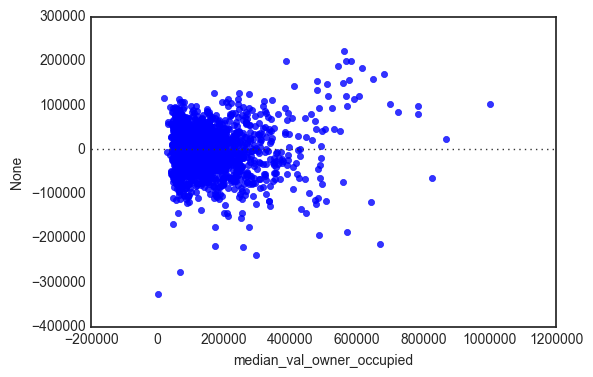

In [39]:
sns.residplot(county.median_val_owner_occupied,lm.resid)

We check for independence in the _errors_, not the outcome variable itself. This data looks to have uncorrelated errors, because they seem to vary randomly. 

When errors are correlated, each one will appear to follow from the last in a pattern.


<img src=resources/correlatedErrors.png align="center" width="50%"></div>

Source: http://zoonek2.free.fr/UNIX/48_R/11.html

### How does the model come up with the correlation coefficient and intercept? 

It uses a method called "Least Sqaures". We will use another method called Stochastic Gradient Descent.
Lets explore that below : 

In [71]:
class LinearRegression_SGD:
    
    def __init__(self, learning_rate, n_epoch):
        self.learning_rate = learning_rate
        self.n_epoch = n_epoch
        
    def fit(self, X, y, logplot = False):
        mse = []
        coefs = []
        self.coef = np.zeros(X.shape[1] + 1)
        X = X.values
        X = np.c_[np.ones(X.shape[0]), X]
        for epoch in range(self.n_epoch):
            for i in range(X.shape[0]):
                X_i = X[i,:]
                e_i = y[i] - self.linearPredict(X_i)
                self.coef = self.coef + self.learning_rate * e_i * X_i
            if logplot:
                coefs.append(np.log(np.abs( self.coef )))
            else:
                coefs.append(self.coef)
            residuals = y - self.linearPredict(X)
            if logplot:
                mse.append(np.log( np.mean(residuals**2) ))
            else:
                mse.append(np.mean(residuals**2))
        plt.plot(range(self.n_epoch),mse)
        plt.xlabel('epoch')
        plt.ylabel('MSE')
        if logplot:
            plt.ylabel('log of MSE')
        plt.figure()
        coefs = np.array(coefs)
        plt.plot(range(self.n_epoch),coefs[:,0],label='w0')
        plt.plot(range(self.n_epoch),coefs[:,1],label='w1')
        plt.plot(range(self.n_epoch),coefs[:,2],label='w2')
        plt.legend()
        plt.xlabel('epoch')
        plt.ylabel('parameter value')
        if logplot:
            plt.ylabel('log of parameter magnitude')

    def predict(self, X):
        X = X.values
        X = np.c_[np.ones(X.shape[0]), X]
        return self.linearPredict(X)
        
    def linearPredict(self, X):
        return X.dot(self.coef)

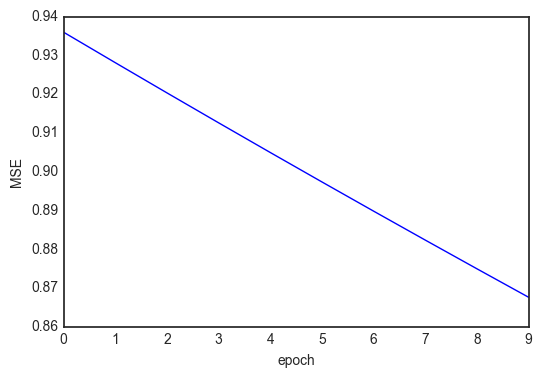

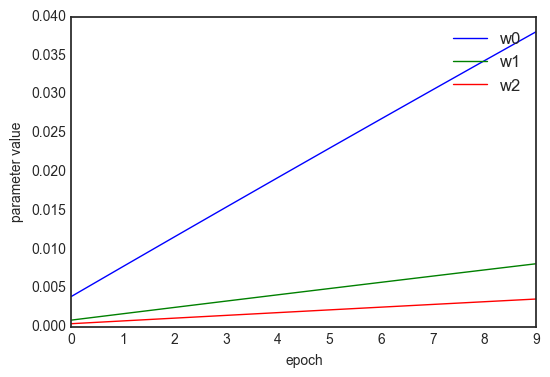

In [92]:
subset = county[0:40]
from sklearn.preprocessing import normalize

subset_norm = pd.DataFrame(normalize(subset[['per_capita_income','sales_per_capita','median_val_owner_occupied']]), columns =['per_capita_income','sales_per_capita','median_val_owner_occupied'] )
X = subset_norm[['per_capita_income','sales_per_capita']]
y = subset_norm.median_val_owner_occupied

sgd = LinearRegression_SGD(.0001,10)
sgd.fit(X,y)

Additional resources to learn SGD : 
https://leon.bottou.org/projects/sgd